In [1]:
import pandas as pd 
import seaborn as sns

In [2]:
data = pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


<AxesSubplot: xlabel='Salary', ylabel='Count'>

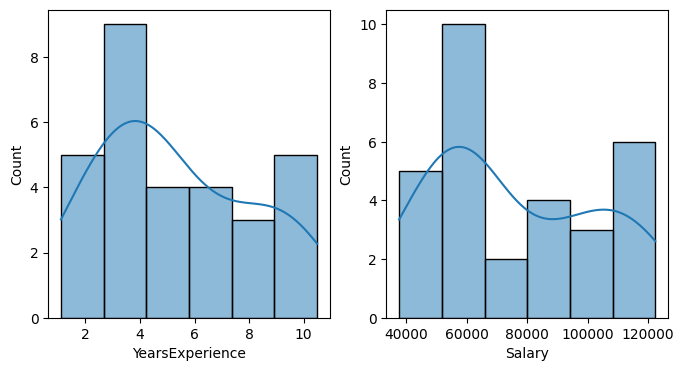

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
sns.histplot(data['YearsExperience'],kde=True)

plt.subplot(1,2,2)
sns.histplot(data['Salary'],kde=True)

<AxesSubplot: xlabel='YearsExperience', ylabel='Salary'>

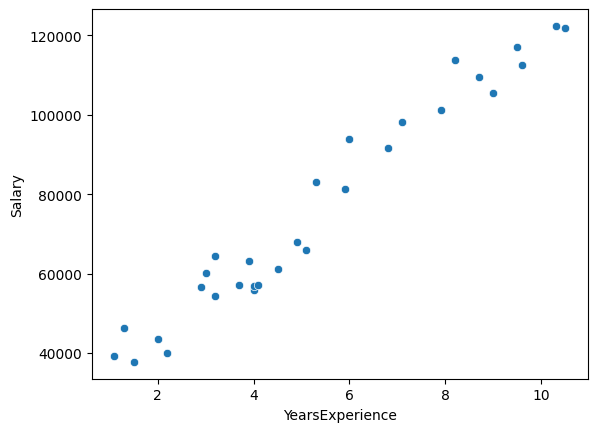

In [7]:
sns.scatterplot(x=data['YearsExperience'],y=data['Salary'])

## Fitting a Linear Regression Model

In [8]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience",data=data).fit()

<AxesSubplot: xlabel='YearsExperience', ylabel='Salary'>

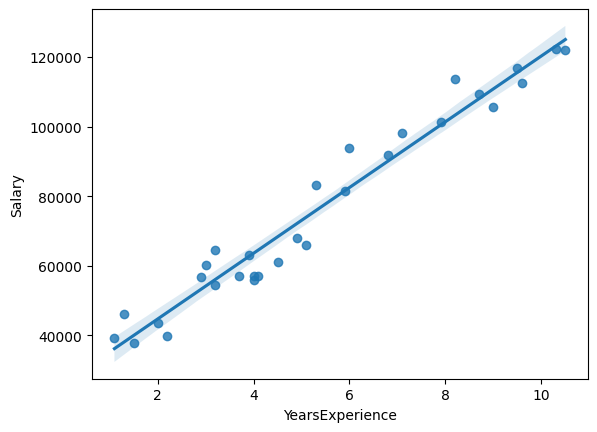

In [11]:
sns.regplot(x='YearsExperience',y='Salary', data=data)

In [12]:
model.params              # coefficients

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [13]:
print(model.tvalues, '\n', model.pvalues)  # t-values and p-values

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [14]:
model.rsquared,model.rsquared_adj       # r-squared value

(0.9569566641435086, 0.9554194021486339)

## Predict for new data point

In [16]:
newdata=pd.Series([10,11.5])

data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])

data_pred['Salary']=model.predict(data_pred)

data_pred

,YearsExperience,Salary
0,10.0,120291.823413
1,11.5,134466.766895
